In [2]:
import pandas as pd
import os 

In [58]:
import numpy as np

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.pyplot import cm
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [4]:
GM12878_TAD = pd.read_csv("Carter Lab Datasets/TAD Data/GSE63525_GM12878_primary+replicate_Arrowhead_domainlist.txt", delimiter = "\t")

In [5]:
BLCA = pd.read_csv("Carter Lab Datasets/meQTL Data/BLCA_tumor.cis_meQTL.txt", delimiter = "\t")
BLCA

,cancer_type,snp,snp_position,alleles,probes,probe_position,probe_gene,beta,status,r,p-value
0,BLCA,rs11684598,chr2:33952621,G/A,cg04131969,chr2:33951647,MYADML,-1.24,-40.26,-0.90,3.940000e-139
1,BLCA,rs12232965,chr2:33954560,C/T,cg04131969,chr2:33951647,MYADML,-1.24,-39.59,-0.90,6.710000e-137
2,BLCA,rs7574695,chr2:33953186,C/T,cg04131969,chr2:33951647,MYADML,-1.24,-39.35,-0.90,4.230000e-136
3,BLCA,rs11777332,chr8:91676709,G/A,cg16814680,chr8:91681699,NaN,-1.20,-36.65,-0.88,8.170000e-127
4,BLCA,rs4332092,chr8:91677926,G/A,cg16814680,chr8:91681699,NaN,-1.20,-36.65,-0.88,8.170000e-127
...,...,...,...,...,...,...,...,...,...,...,...
502769,BLCA,rs7479216,chr11:1390885,G/T,cg06066251,chr11:1309984,TOLLIP,0.43,6.02,0.30,4.150000e-09
502770,BLCA,rs27106,chr5:14455378,C/G,cg17687981,chr5:14475938,TRIO,0.37,6.02,0.30,4.150000e-09
502771,BLCA,rs35137725,chr16:3204273,A/C,cg05225996,chr16:3163017,ZNF205;MGC3771,0.19,6.02,0.30,4.150000e-09
502772,BLCA,rs419055,chr15:47676519,A/T,cg21821684,chr15:47686828,NaN,0.36,6.02,0.30,4.150000e-09


In [6]:
meqtl_files=os.listdir("Carter Lab Datasets/meQTL Data/")
compiled_meqtl=pd.DataFrame()

for x in meqtl_files:
    if x == "BLCA_tumor.cis_meQTL.txt":
        df = pd.read_csv("Carter Lab Datasets/meQTL Data/"+x, delimiter = "\t")
    else:
        df=pd.read_csv("Carter Lab Datasets/meQTL Data/"+x)
    df["cancer"]=x.split("_")[0]
    compiled_meqtl=compiled_meqtl.append(df)

C:\Users\sherv\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (10,11,12,13) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\Users\sherv\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\Users\sherv\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\Users\sherv\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27) have mixed types.Specify dtype option o

In [7]:
compiled_meqtl.shape

(13539332, 33)

In [8]:
compiled_meqtl["chr"]=compiled_meqtl["snp_position"].str.split(":").str[0]
compiled_meqtl["bp"]=compiled_meqtl["snp_position"].str.split(":").str[1]

In [9]:
compiled_meqtl["bp"]=pd.to_numeric(compiled_meqtl["bp"])

In [10]:
compiled_meqtl["p-value"]=pd.to_numeric(compiled_meqtl["p-value"],errors="coerce")

In [11]:
compiled_meqt_sig=compiled_meqtl[compiled_meqtl["p-value"]<.00001]

In [12]:
compiled_meqt_sig=compiled_meqt_sig[compiled_meqt_sig["p-value"]>0]

In [13]:
compiled_meqt_sig.shape

(11616299, 35)

In [14]:
num_meqtl=[]
for i,row in GM12878_TAD.iterrows():
    if i % 100 == 0:
        print("{} rows done".format(i))
    meqtl_chr=compiled_meqt_sig[compiled_meqt_sig["chr"]=="chr"+str(row["chr1"])]
    meqtl_sig=meqtl_chr[(meqtl_chr["bp"]>row["x1"])&(meqtl_chr["bp"]<row["x2"])]
    num_meqtl.append(len(meqtl_sig["snp"].unique()))
    #print(len(meqtl_sig["snp"].unique()))
    
    

0 rows done
100 rows done
200 rows done
300 rows done
400 rows done
500 rows done
600 rows done
700 rows done
800 rows done
900 rows done
1000 rows done
1100 rows done
1200 rows done
1300 rows done
1400 rows done
1500 rows done
1600 rows done
1700 rows done
1800 rows done
1900 rows done
2000 rows done
2100 rows done
2200 rows done
2300 rows done
2400 rows done
2500 rows done
2600 rows done
2700 rows done
2800 rows done
2900 rows done
3000 rows done
3100 rows done
3200 rows done
3300 rows done
3400 rows done
3500 rows done
3600 rows done
3700 rows done
3800 rows done
3900 rows done
4000 rows done
4100 rows done
4200 rows done
4300 rows done
4400 rows done
4500 rows done
4600 rows done
4700 rows done
4800 rows done
4900 rows done
5000 rows done
5100 rows done
5200 rows done
5300 rows done
5400 rows done
5500 rows done
5600 rows done
5700 rows done
5800 rows done
5900 rows done
6000 rows done
6100 rows done
6200 rows done
6300 rows done
6400 rows done
6500 rows done
6600 rows done
6700 ro

In [15]:
GM12878_TAD["#meqtl"]=num_meqtl

In [16]:
GM12878_TAD["size"]=GM12878_TAD["x2"]-GM12878_TAD["x1"]

Text(0.5, 0, 'TAD domain size (bp)')

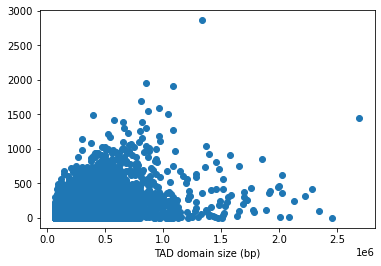

In [17]:
plt.scatter(GM12878_TAD["size"],GM12878_TAD["#meqtl"])
plt.xlabel("TAD domain size (bp)")
plt.xlabel("TAD domain size (bp)")

In [21]:
GM12878_TAD.to_csv("Carter Lab Datasets/GM12878_TAD_meQTLs.csv")

In [14]:
compiled_meqtl[compiled_meqtl["chr"]=="1"]

,cancer_type,snp,snp_position,alleles,probes,probe_position,probe_gene,beta,status,r,...,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,cancer,Unnamed: 29,Unnamed: 30,Unnamed: 31,chr,bp


In [15]:
compiled_meqtl

,cancer_type,snp,snp_position,alleles,probes,probe_position,probe_gene,beta,status,r,...,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,cancer,Unnamed: 29,Unnamed: 30,Unnamed: 31,chr,bp
0,LAML,rs11777332,chr8:91676709,G/A,cg16814680,chr8:91681699,NaN,-1.2,-20.72,-0.9,...,NaN,NaN,NaN,NaN,LAML,NaN,NaN,NaN,chr8,NaN
1,LAML,rs4332092,chr8:91677926,G/A,cg16814680,chr8:91681699,NaN,-1.2,-20.72,-0.9,...,NaN,NaN,NaN,NaN,LAML,NaN,NaN,NaN,chr8,NaN
2,LAML,rs4377924,chr8:91678575,T/C,cg16814680,chr8:91681699,NaN,-1.2,-20.72,-0.9,...,NaN,NaN,NaN,NaN,LAML,NaN,NaN,NaN,chr8,NaN
3,LAML,rs4642598,chr8:91678587,A/G,cg16814680,chr8:91681699,NaN,-1.2,-20.72,-0.9,...,NaN,NaN,NaN,NaN,LAML,NaN,NaN,NaN,chr8,NaN
4,LAML,rs4301409,chr8:91679451,C/T,cg16814680,chr8:91681699,NaN,-1.2,-20.66,-0.9,...,NaN,NaN,NaN,NaN,LAML,NaN,NaN,NaN,chr8,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408015,ESCA,rs9314101,chr5:93461593,A/T,cg21475434,chr5:93447410,FAM172A,0.68,4.41,0.34,...,NaN,NaN,NaN,NaN,ESCA,NaN,NaN,NaN,chr5,NaN
408016,ESCA,rs10476526,chr5:93461916,G/A,cg21475434,chr5:93447410,FAM172A,0.68,4.41,0.34,...,NaN,NaN,NaN,NaN,ESCA,NaN,NaN,NaN,chr5,NaN
408017,ESCA,rs1461529,chr18:51633953,A/G,cg11718707,chr18:51750159,MBD2,SNORA37,1.08,4.41,...,NaN,NaN,NaN,NaN,ESCA,NaN,NaN,NaN,chr18,NaN
408018,ESCA,rs9943746,chr12:5746292,T/C,cg15869694,chr12:6643747,GAPDH,-0.5,-4.41,-0.34,...,NaN,NaN,NaN,NaN,ESCA,NaN,NaN,NaN,chr12,NaN


In [23]:
GM12878_TAD_meQTL = pd.read_csv("Carter Lab Datasets/GM12878_TAD_meQTLs.csv")
GM12878_TAD_meQTL.head()

,Unnamed: 0,chr1,x1,x2,chr2,y1,y2,color,f1,f2,f3,f4,f5,#meqtl,size
0,0,1,144835000,145835000,1,144835000,145835000,"255,255,0",0.55170,0.35009,0.26860,0.43080,0.53910,299,1000000
1,1,1,68985000,70260000,1,68985000,70260000,"255,255,0",0.34374,0.27084,0.29571,0.40022,0.50935,99,1275000
2,2,1,49365000,50810000,1,49365000,50810000,"255,255,0",1.05670,0.24008,0.24148,0.49497,0.68434,18,1445000
3,3,1,163360000,164895000,1,163360000,164895000,"255,255,0",1.15700,0.21904,0.24336,0.71738,0.60165,166,1535000
4,4,1,247800000,248395000,1,247800000,248395000,"255,255,0",0.33524,0.18309,0.27343,0.40819,0.40678,453,595000


In [24]:
sorted_num_meQTLs = GM12878_TAD_meQTL.sort_values("#meqtl", ascending = False)
sorted_num_meQTLs

,Unnamed: 0,chr1,x1,x2,chr2,y1,y2,color,f1,f2,f3,f4,f5,#meqtl,size
7241,7241,6,168710000,170045000,6,168710000,170045000,"255,255,0",0.38212,0.258870,0.240630,0.40804,0.40100,2866,1335000
7845,7845,7,1590000,2440000,7,1590000,2440000,"255,255,0",1.38400,0.097712,0.098596,0.78810,0.80277,1956,850000
7816,7816,7,157245000,158330000,7,157245000,158330000,"255,255,0",1.13380,0.160820,0.162820,0.83410,0.50228,1915,1085000
8306,8306,8,8070000,8875000,8,8070000,8875000,"255,255,0",1.51740,0.055865,0.112340,0.94985,0.54275,1690,805000
1860,1860,12,120740000,121700000,12,120740000,121700000,"255,255,0",1.38440,0.106540,0.085875,0.79240,0.73026,1587,960000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8469,8469,8,126715000,126900000,8,126715000,126900000,"255,255,0",1.19460,0.046497,0.037830,0.86842,0.64035,0,185000
6441,6441,4,123295000,123500000,4,123295000,123500000,"255,255,0",0.87812,0.058051,0.069259,0.50238,0.56905,0,205000
4642,4642,20,6815000,6920000,20,6815000,6920000,"255,255,0",0.89821,0.022221,0.015130,0.71818,0.55455,0,105000
2284,2284,12,56225000,56320000,12,56225000,56320000,"255,255,0",1.12910,0.019108,0.020564,0.74444,0.72222,0,95000


In [25]:
top_sorted_num_meQTLs = sorted_num_meQTLs[:1000]
top_num_meQTLs = top_sorted_num_meQTLs["#meqtl"]
top_sorted_num_meQTLs

,Unnamed: 0,chr1,x1,x2,chr2,y1,y2,color,f1,f2,f3,f4,f5,#meqtl,size
7241,7241,6,168710000,170045000,6,168710000,170045000,"255,255,0",0.38212,0.258870,0.240630,0.40804,0.40100,2866,1335000
7845,7845,7,1590000,2440000,7,1590000,2440000,"255,255,0",1.38400,0.097712,0.098596,0.78810,0.80277,1956,850000
7816,7816,7,157245000,158330000,7,157245000,158330000,"255,255,0",1.13380,0.160820,0.162820,0.83410,0.50228,1915,1085000
8306,8306,8,8070000,8875000,8,8070000,8875000,"255,255,0",1.51740,0.055865,0.112340,0.94985,0.54275,1690,805000
1860,1860,12,120740000,121700000,12,120740000,121700000,"255,255,0",1.38440,0.106540,0.085875,0.79240,0.73026,1587,960000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7300,7300,6,156875000,157370000,6,156875000,157370000,"255,255,0",1.46480,0.054181,0.121610,0.88612,0.78653,331,495000
7752,7752,6,33395000,33540000,6,33395000,33540000,"255,255,0",1.33270,0.018044,0.022404,0.81429,0.85238,331,145000
110,110,1,100215000,100925000,1,100215000,100925000,"255,255,0",1.31920,0.082188,0.075084,0.91887,0.71097,330,710000
8513,8513,8,135520000,135700000,8,135520000,135700000,"255,255,0",1.67700,0.040219,0.033755,0.90432,0.90432,330,180000


In [65]:
top_sorted_num_meQTLs = top_sorted_num_meQTLs.drop("Unnamed: 0", axis = 1)
top_sorted_num_meQTLs

,chr1,x1,x2,chr2,y1,y2,color,f1,f2,f3,f4,f5,#meqtl,size
7241,6,168710000,170045000,6,168710000,170045000,"255,255,0",0.38212,0.258870,0.240630,0.40804,0.40100,2866,1335000
7845,7,1590000,2440000,7,1590000,2440000,"255,255,0",1.38400,0.097712,0.098596,0.78810,0.80277,1956,850000
7816,7,157245000,158330000,7,157245000,158330000,"255,255,0",1.13380,0.160820,0.162820,0.83410,0.50228,1915,1085000
8306,8,8070000,8875000,8,8070000,8875000,"255,255,0",1.51740,0.055865,0.112340,0.94985,0.54275,1690,805000
1860,12,120740000,121700000,12,120740000,121700000,"255,255,0",1.38440,0.106540,0.085875,0.79240,0.73026,1587,960000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7300,6,156875000,157370000,6,156875000,157370000,"255,255,0",1.46480,0.054181,0.121610,0.88612,0.78653,331,495000
7752,6,33395000,33540000,6,33395000,33540000,"255,255,0",1.33270,0.018044,0.022404,0.81429,0.85238,331,145000
110,1,100215000,100925000,1,100215000,100925000,"255,255,0",1.31920,0.082188,0.075084,0.91887,0.71097,330,710000
8513,8,135520000,135700000,8,135520000,135700000,"255,255,0",1.67700,0.040219,0.033755,0.90432,0.90432,330,180000


In [42]:
genes_associated = {}
for j, row in top_sorted_num_meQTLs.iterrows():
    if j % 100 == 0:
        print(j)
    key = str(row["x1"]) + " " + str(row["x2"])
    compiled_chr_nums = compiled_meqt_sig[compiled_meqt_sig["chr"]=="chr"+str(row["chr1"])]
    compiled_fit_meQTLs = compiled_chr_nums[(compiled_chr_nums["bp"]>row["x1"])&(compiled_chr_nums["bp"]<row["x2"])]
    compiled_fit_meQTLs = compiled_fit_meQTLs["probe_gene"].dropna().unique()
    genes_associated[key] = compiled_fit_meQTLs

7900
5700
4600
900
3300
6800
7400
1400
7300


In [53]:
ma = 0
for key in genes_associated:
    ma = max(ma, len(genes_associated[key]))
print(ma)
genes_associated

48


{'168710000 170045000': array(['PHF10', 'WDR27', 'SMOC2', 'C6orf70', 'DACT2', 'THBS2', 'C6orf208',
        'FAM120B', 'KIF25', 'FRMD1'], dtype=object),
 '1590000 2440000': array(['EIF3B', 'MAD1L1', 'TMEM184A', 'SNX8', 'ELFN1', 'IQCE', 'C7orf50',
        'AMZ1', 'INTS1', 'TTYH3', 'CARD11', 'MAFK', 'UNC84A', 'LFNG',
        'HEATR2', 'NUDT1', 'UNCX', 'C7orf27', 'FTSJ2', 'GNA12'],
       dtype=object),
 '157245000 158330000': array(['PTPRN2', 'PTPRN2;MIR595', 'DNAJB6', 'NOM1', 'UBE3C', 'NCAPG2',
        'MNX1', 'ESYT2', 'VIPR2', 'WDR60'], dtype=object),
 '8070000 8875000': array(['FLJ10661', 'CLDN23', 'MFHAS1', 'TNKS', 'PRAGMIN', 'ERI1',
        'PPP1R3B', 'FAM66E', 'FAM90A7', 'FAM90A10'], dtype=object),
 '120740000 121700000': array(['POP5', 'C12orf43', 'COQ5', 'DYNLL1', 'PLA2G1B', 'CABP1', 'P2RX7',
        'HNF1A', 'UNC119B', 'CAMKK2', 'SPPL3', 'MSI1', 'RNF10', 'ANAPC5',
        'P2RX4', 'MLEC', 'RAB35', 'ACADS', 'C12orf27', 'LOC338799',
        'TMEM120B', 'GCN1L1', 'SIRT4', 'COX6A1', 

In [46]:
GM12878_TAD_genes = pd.DataFrame()
GM12878_TAD_genes["TAD pos1"] = []
GM12878_TAD_genes["TAD pos2"] = []
for i in range(1, 49):
    name = "gene" + str(i)
    GM12878_TAD_genes[name] = []
GM12878_TAD_genes

,TAD pos1,TAD pos2,gene1,gene2,gene3,gene4,gene5,gene6,gene7,gene8,...,gene39,gene40,gene41,gene42,gene43,gene44,gene45,gene46,gene47,gene48


In [47]:
all_pos1 = []
all_pos2 = []
for tad in genes_associated:
    l = tad.split(' ')
    pos1, pos2 = int(l[0]), int(l[1])
    all_pos1.append(pos1)
    all_pos2.append(pos2)
    
GM12878_TAD_genes["TAD pos1"] = all_pos1
GM12878_TAD_genes["TAD pos2"] = all_pos2
GM12878_TAD_genes



,TAD pos1,TAD pos2,gene1,gene2,gene3,gene4,gene5,gene6,gene7,gene8,...,gene39,gene40,gene41,gene42,gene43,gene44,gene45,gene46,gene47,gene48
0,168710000,170045000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1590000,2440000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,157245000,158330000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,8070000,8875000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,120740000,121700000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,156875000,157370000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,33395000,33540000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,100215000,100925000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
998,135520000,135700000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
GM12878_TAD_genes = GM12878_TAD_genes.replace(np.nan, '', regex=True)
GM12878_TAD_genes

,TAD pos1,TAD pos2,gene1,gene2,gene3,gene4,gene5,gene6,gene7,gene8,...,gene39,gene40,gene41,gene42,gene43,gene44,gene45,gene46,gene47,gene48
0,168710000,170045000,,,,,,,,,...,,,,,,,,,,
1,1590000,2440000,,,,,,,,,...,,,,,,,,,,
2,157245000,158330000,,,,,,,,,...,,,,,,,,,,
3,8070000,8875000,,,,,,,,,...,,,,,,,,,,
4,120740000,121700000,,,,,,,,,...,,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,156875000,157370000,,,,,,,,,...,,,,,,,,,,
996,33395000,33540000,,,,,,,,,...,,,,,,,,,,
997,100215000,100925000,,,,,,,,,...,,,,,,,,,,
998,135520000,135700000,,,,,,,,,...,,,,,,,,,,


In [61]:
ind = 0
for tad2 in genes_associated:
    for i in range(len(genes_associated[tad2])):
        key_name = "gene" + str(i+1)
        GM12878_TAD_genes.at[ind, key_name] = genes_associated[tad2][i]
    ind += 1

# GM12878_TAD_genes.at[0, "gene1"] = "PHF10"
# print(GM12878_TAD_genes.iloc[0]["gene1"])
GM12878_TAD_genes

,TAD pos1,TAD pos2,gene1,gene2,gene3,gene4,gene5,gene6,gene7,gene8,...,gene39,gene40,gene41,gene42,gene43,gene44,gene45,gene46,gene47,gene48
0,168710000,170045000,PHF10,WDR27,SMOC2,C6orf70,DACT2,THBS2,C6orf208,FAM120B,...,,,,,,,,,,
1,1590000,2440000,EIF3B,MAD1L1,TMEM184A,SNX8,ELFN1,IQCE,C7orf50,AMZ1,...,,,,,,,,,,
2,157245000,158330000,PTPRN2,PTPRN2;MIR595,DNAJB6,NOM1,UBE3C,NCAPG2,MNX1,ESYT2,...,,,,,,,,,,
3,8070000,8875000,FLJ10661,CLDN23,MFHAS1,TNKS,PRAGMIN,ERI1,PPP1R3B,FAM66E,...,,,,,,,,,,
4,120740000,121700000,POP5,C12orf43,COQ5,DYNLL1,PLA2G1B,CABP1,P2RX7,HNF1A,...,,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,156875000,157370000,ARID1B,ZDHHC14,,,,,,,...,,,,,,,,,,
996,33395000,33540000,BAK1,ITPR3,HLA-DRB1,SYNGAP1,KIFC1,GRM4,,,...,,,,,,,,,,
997,100215000,100925000,HIAT1,AGL,GPR88,SLC35A3,LPPR4,,,,...,,,,,,,,,,
998,135520000,135700000,ZFAT,,,,,,,,...,,,,,,,,,,


In [66]:
GM12878_TAD_genes.to_csv("Carter Lab Datasets/GM12878_TAD_genes.csv")
GM12878_TAD_genes.to_csv("Carter Lab Datasets/GM12878_TAD_genes.tsv", sep="\t")
top_sorted_num_meQTLs.to_csv("Carter Lab Datasets/top_sorted_num_meQTLs.csv", index = False)
top_sorted_num_meQTLs.to_csv("Carter Lab Datasets/top_sorted_num_meQTLs.tsv", sep="\t", index = False)

In [26]:
compiled_meqt_sig.head()

,cancer_type,snp,snp_position,alleles,probes,probe_position,probe_gene,beta,status,r,...,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,chr,bp
0,BLCA,rs11684598,chr2:33952621,G/A,cg04131969,chr2:33951647,MYADML,-1.24,-40.26,-0.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,chr2,33952621
1,BLCA,rs12232965,chr2:33954560,C/T,cg04131969,chr2:33951647,MYADML,-1.24,-39.59,-0.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,chr2,33954560
2,BLCA,rs7574695,chr2:33953186,C/T,cg04131969,chr2:33951647,MYADML,-1.24,-39.35,-0.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,chr2,33953186
3,BLCA,rs11777332,chr8:91676709,G/A,cg16814680,chr8:91681699,NaN,-1.2,-36.65,-0.88,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,chr8,91676709
4,BLCA,rs4332092,chr8:91677926,G/A,cg16814680,chr8:91681699,NaN,-1.2,-36.65,-0.88,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,chr8,91677926


In [4]:
cancer_types_names = ["BLCA_meQTL", "BRCA_meQTL", "CESC_meQTL", "CRC_meQTL", "ESCA_meQTL", "HNSC_meQTL", "KIRC_meQTL", "KIRP_meQTL", "LAML_meQTL",
               "LGG_meQTL", "LIHC_meQTL", "LUAD_meQTL", "LUSC_meQTL", "PAAD_meQTL", "PCPG_meQTL", "PRAD_meQTL", "SARC_meQTL", "SKCM_meQTL", 
               "STAD_meQTL", "TGCT_meQTL", "THCA_meQTL", "THYM_meQTL", "UCEC_meQTL"]